In [66]:
#initialising
import matplotlib.pyplot as plt
import math
import numpy as np

#manually extracted from matlab code using Jwon345 as input
reflectors = {
    1: [8.54,-5.23],
    2: [-7.41,9.69],
    3: [9.63,6.93],
    4: [-8.2,5.89],
    5: [3.72,8.01],
    6: [8.58,5.6],
    7: [-7.16,6.73],
    8: [7.69,-3.58],
    9: [-9.6,4.85],
    10: [-3.15,3.29]
    }

transmitter = [0,0]
reciever = [10,10]

Co = 3e8

def getDistance(x,y):
    
    return (math.hypot(x,y) + math.hypot(reciever[0] - x, reciever[1] - y))


print(getDistance(0,0))
print(Co)


14.142135623730951
300000000.0


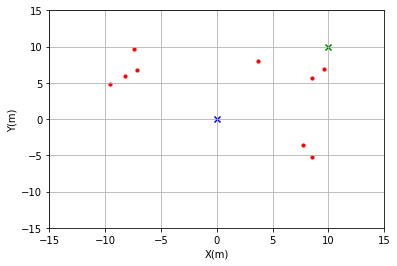

In [67]:
#plotting the reflectors
for i in range(1,10):
    plt.scatter(
    reflectors[i][0],
    reflectors[i][1],
    color = "red",
    s=10
    )

plt.scatter(transmitter[0], transmitter[1], color = "blue", marker="x") #plotting the transmitter
plt.scatter(reciever[0], reciever[1], color = "green", marker="x") #plotting the reciever

plt.grid(True)
plt.xlim(-15,15)
plt.ylim(-15,15)

plt.ylabel("Y(m)")
plt.xlabel("X(m)")

plt.show()

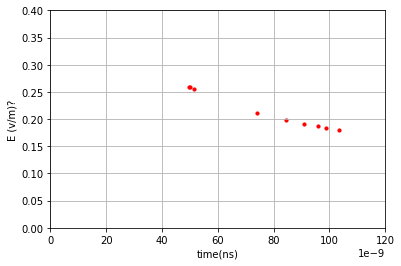

In [68]:
#plotting the reflectors
for i in range(1,10):
    plt.scatter(
    getDistance(reflectors[i][0], reflectors[i][1])/Co,
    (1/getDistance(reflectors[i][0], reflectors[i][1])**0.5),
    color = "red",
    s=10
    )



plt.grid(True)
plt.ylabel("E (v/m)?")
plt.xlabel("time(ns)")

plt.ticklabel_format(axis="x", style="sci", scilimits=(-9,-9))
plt.xlim(0,120e-9)
plt.ylim(0,0.4)



plt.show()

In [69]:
def getSum(f):
    total = 0 + 0j
    for count in range(1,10):
        total += (1/getDistance(reflectors[count][0], reflectors[count][1])**0.5) * np.cos(2*np.pi*getDistance(reflectors[count][0], reflectors[count][1])/(Co/f))
        total += (1/getDistance(reflectors[count][0], reflectors[count][1])**0.5) * np.sin(2*np.pi*getDistance(reflectors[count][0], reflectors[count][1])/(Co/f)) * 1j
    return total
    #this is the sum of each impulse 
print(getSum(2.4e9))

(0.23117399277489975+0.20533593814722473j)


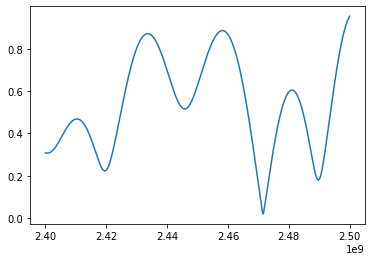

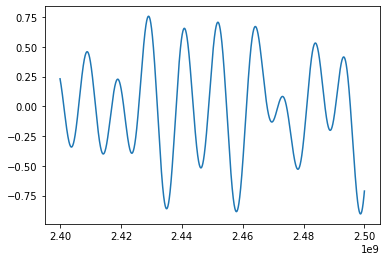

In [76]:
lower = 2.4e9
upper = 2.5e9
t1 = np.arange(lower,upper,10)

plt.plot(t1,abs(getSum(t1)))

plt.show()

plt.plot(t1, getSum(t1).real)
plt.show()
